# Section 7: ANNs (Artificial Neural Networks)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

## ANN for regression

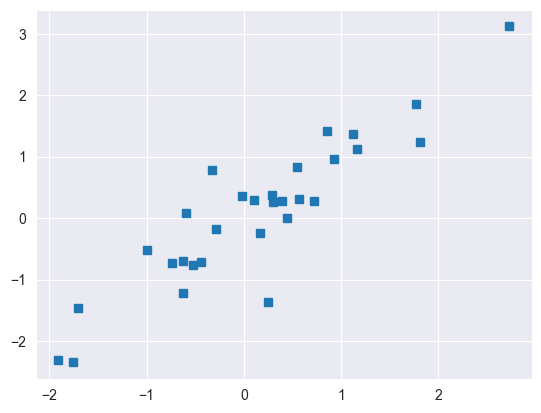

In [2]:
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2

plt.plot(x, y, 's')
plt.show()

In [3]:
ann_regression = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1)
)

ann_regression

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
learning_rate = .05
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(ann_regression.parameters(), learning_rate)
epochs = 500
losses = torch.zeros(epochs)

In [5]:
for epoch in range(epochs):
    y_pred = ann_regression(x)
    loss = loss_function(y_pred, y)
    losses[epoch] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

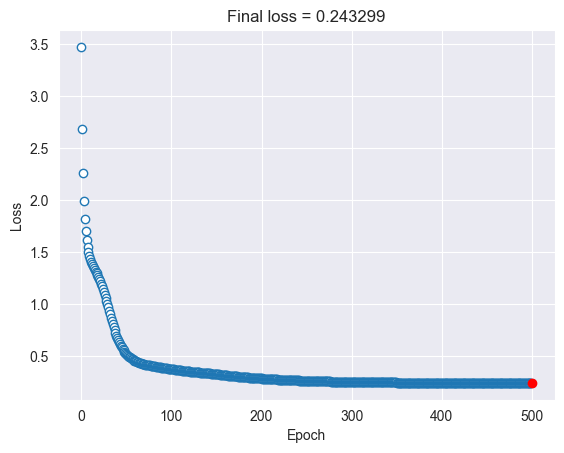

In [6]:
y_final_pred = ann_regression(x)
test_loss = (y_final_pred - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(epochs, test_loss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Final loss = %g" %test_loss.item())
plt.show()

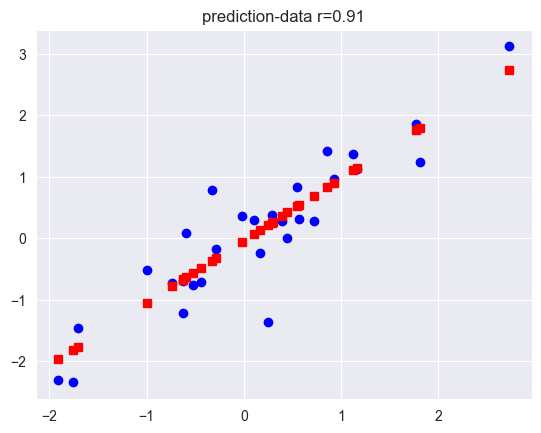

In [7]:
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, y_final_pred.detach(), 'rs', label='Predictions')
plt.title(f"prediction-data r={np.corrcoef(y.T, y_final_pred.detach().T)[0, 1]:.2f}")
plt.show()

## CodeChallenge: manipulate regression slopes

In [8]:
def create_data(m):
    n_local = 50
    x_local = torch.randn(n_local, 1)
    y_local = m * x_local + torch.randn(n_local, 1) / 2
    
    return x_local, y_local

def build_and_train_model(x_param, y_param):
    ann_regression_local = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1)
    )
    loss_function_local = nn.MSELoss()
    optimizer_local = torch.optim.SGD(ann_regression_local.parameters(), learning_rate)
    losses_local = torch.zeros(epochs)
    
    for epoch_local in range(epochs):
        y_pred_local = ann_regression_local(x_param)
        loss_local = loss_function_local(y_pred_local, y_param)
        losses_local[epoch_local] = loss_local
        
        optimizer_local.zero_grad()
        loss_local.backward()
        optimizer_local.step()

    return losses_local.detach()[-1]

slopes = np.linspace(-2, 2, 21)
y_final_preds = np.zeros(len(slopes))
experiments = 50
y_final_preds_experiments = np.zeros((experiments, len(slopes)))

for experiment in range(experiments):
    for i, slope in enumerate(slopes):
        x, y = create_data(slope)
        y_final_preds[i] = build_and_train_model(x, y)
        
    y_final_preds_experiments[experiment] = y_final_preds

In [9]:
experiments_losses = y_final_preds_experiments.mean(axis=0)

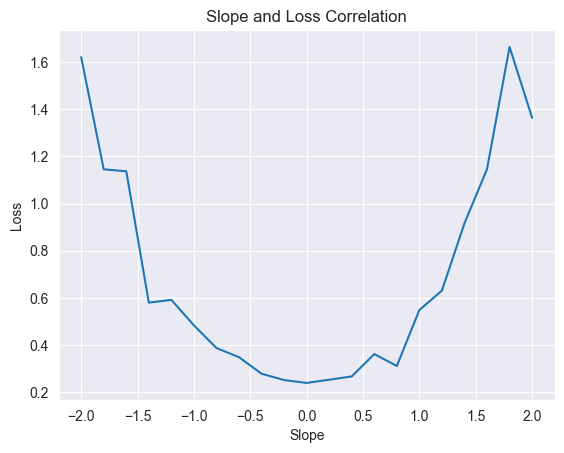

In [10]:
plt.plot(slopes, experiments_losses)
plt.xlabel('Slope')
plt.ylabel('Loss')
plt.title("Slope and Loss Correlation")
plt.show()

## ANN for classifying qwerties

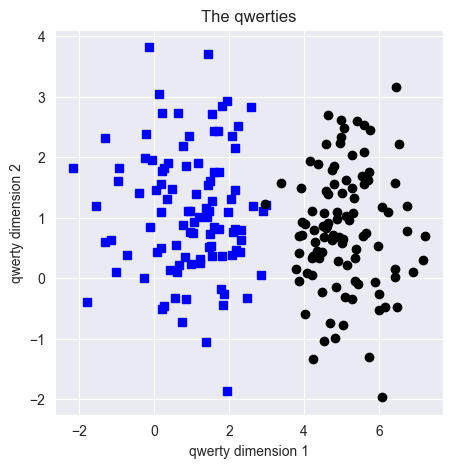

In [11]:
n_per_cluster = 100
blur = 1
A = [1, 1]
B = [5, 1]
a = [A[0] + np.random.randn(n_per_cluster) * blur, A[1] + np.random.randn(n_per_cluster) * blur]
b = [B[0] + np.random.randn(n_per_cluster) * blur, B[1] + np.random.randn(n_per_cluster) * blur]
labels_np = np.vstack((np.zeros((n_per_cluster, 1)), np.ones((n_per_cluster, 1))))
data_np = np.hstack((a, b)).T
y = torch.tensor(labels_np).float()
x = torch.tensor(data_np).float()

plt.figure(figsize=(5, 5))
plt.plot(x[np.where(y == 0)[0], 0], x[np.where(y == 0)[0], 1], 'bs')
plt.plot(x[np.where(y == 1)[0], 0], x[np.where(y == 1)[0], 1], 'ko')
plt.title("The qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [12]:
ann_classification = nn.Sequential(
    nn.Linear(2, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
    nn.Sigmoid(),
)

ann_classification

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [13]:
learning_rate = 0.1
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(ann_classification.parameters(), learning_rate)

In [14]:
epochs = 1000
losses = torch.zeros(epochs)

for epoch in range(epochs):
    y_pred = ann_classification(x)
    loss = loss_function(y_pred, y)
    losses[epoch] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

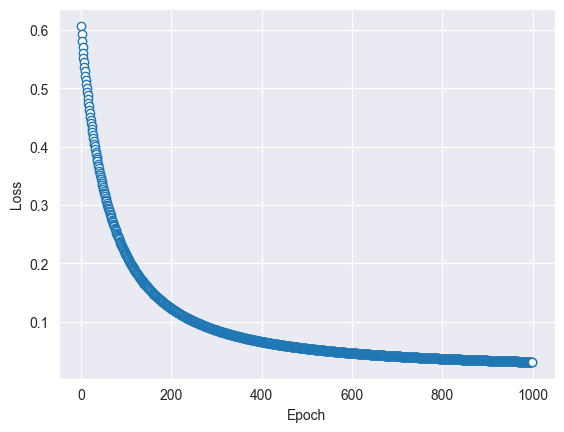

In [15]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
y_final_pred = ann_classification(x) > .5
misclassified = np.where(y_final_pred != y)[0]
total_accuracy = 100 - 100 * len(misclassified) / (2 * n_per_cluster)

print("Final accuracy: %g%%" %total_accuracy)

Final accuracy: 99.5%


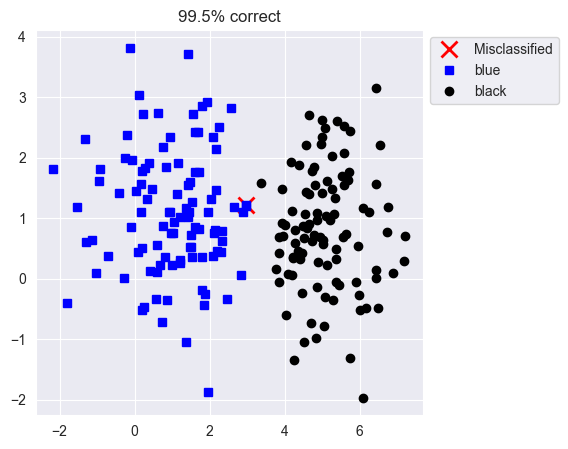

In [17]:
plt.figure(figsize=(5, 5))
plt.plot(x[misclassified, 0], x[misclassified, 1], 'rx', markersize=12, markeredgewidth=2)
plt.plot(x[np.where(~y_final_pred)[0], 0], x[np.where(~y_final_pred)[0], 1], 'bs')
plt.plot(x[np.where(y_final_pred)[0], 0], x[np.where(y_final_pred)[0], 1], 'ko')
plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1, 1))
plt.title(f"{total_accuracy}% correct")
plt.show()

## Learning rates comparison

In [18]:
def create_ann_model(learning_rate_param):
    ann_classification_local = nn.Sequential(
        nn.Linear(2, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
    )
    loss_function_local = nn.BCEWithLogitsLoss()
    optimizer_local = torch.optim.SGD(ann_classification_local.parameters(), learning_rate_param)
    
    return ann_classification_local, loss_function_local, optimizer_local

def train_the_model(ann_classification_param, loss_function_param, optimizer_param):
    losses_local = torch.zeros(epochs)
    
    for epoch_local in range(epochs):
        y_pred_local = ann_classification_param(x)
        loss_local = loss_function_param(y_pred_local, y)
        losses_local[epoch_local] = loss_local    
        
        optimizer_param.zero_grad()
        loss_local.backward()
        optimizer_param.step()
        
    y_final_pred_local = ann_classification_param(x) > 0
    total_accuracy_local = 100 * torch.mean((y_final_pred_local == y).float())
    
    return losses_local, y_final_pred_local, total_accuracy_local 

Final accuracy: 97%


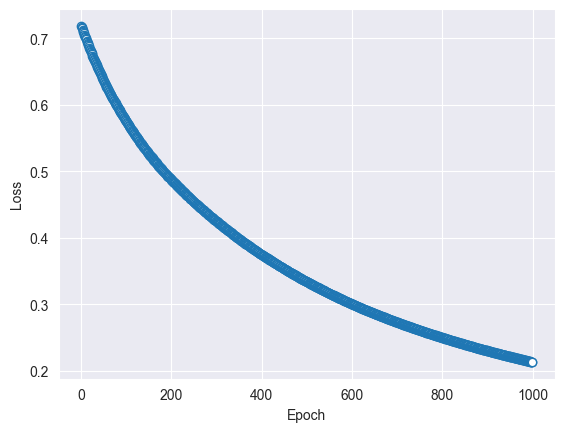

In [19]:
ann_classification, loss_function, optimizer = create_ann_model(.01)
losses, y_final_pred, total_accuracy = train_the_model(ann_classification, loss_function, optimizer)

print("Final accuracy: %g%%" %total_accuracy)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [20]:
learning_rates = np.linspace(.001, .1, 40)
accuracy_by_learning_rate = []
all_losses = np.zeros((len(learning_rates), epochs))

for i, learning_rate, in enumerate(learning_rates):
    ann_classification, loss_function, optimizer = create_ann_model(.01)
    losses, y_final_pred, total_accuracy = train_the_model(ann_classification, loss_function, optimizer)
    
    accuracy_by_learning_rate.append(total_accuracy)
    all_losses[i, :] = losses.detach()

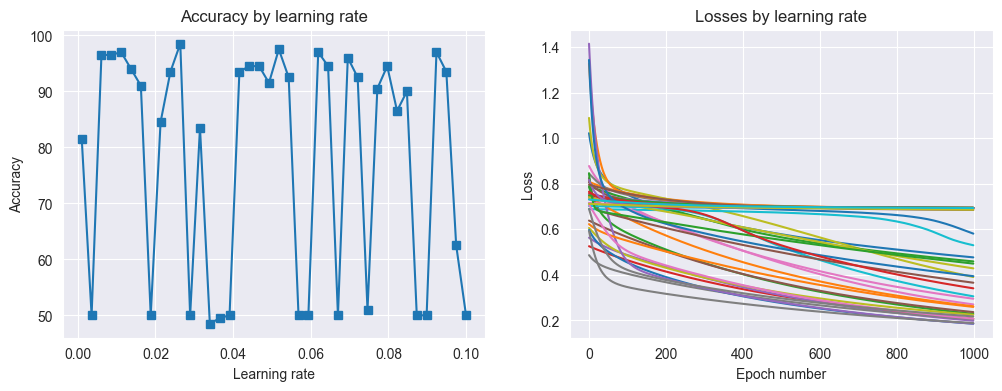

In [21]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learning_rates, accuracy_by_learning_rate, 's-')
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel('Accuracy')
ax[0].set_title("Accuracy by learning rate")
ax[1].plot(all_losses.T)
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel('Loss')
ax[1].set_title("Losses by learning rate")
plt.show()

In [22]:
sum(torch.tensor(accuracy_by_learning_rate) > 70) / len(accuracy_by_learning_rate)

tensor(0.6500)

## Multilayer ANN, Linear solutions to linear problems

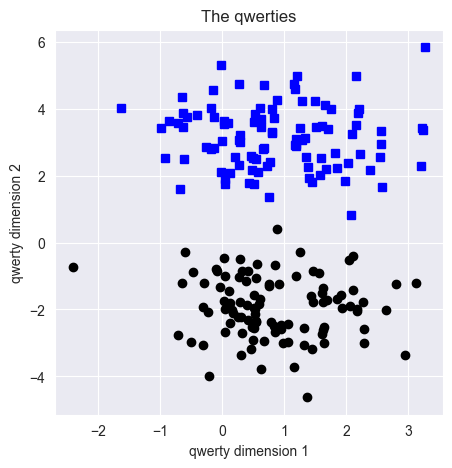

In [23]:
n_per_cluster = 100
blur = 1
A = [1, 3]
B = [1, -2]
a = [A[0] + np.random.randn(n_per_cluster) * blur, A[1] + np.random.randn(n_per_cluster) * blur]
b = [B[0] + np.random.randn(n_per_cluster) * blur, B[1] + np.random.randn(n_per_cluster) * blur]
labels_np = np.vstack((np.zeros((n_per_cluster, 1)), np.ones((n_per_cluster, 1))))
data_np = np.hstack((a, b)).T
y = torch.tensor(labels_np).float()
x = torch.tensor(data_np).float()

plt.figure(figsize=(5, 5))
plt.plot(x[np.where(y == 0)[0], 0], x[np.where(y == 0)[0], 1], 'bs')
plt.plot(x[np.where(y == 1)[0], 0], x[np.where(y == 1)[0], 1], 'ko')
plt.title("The qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [24]:
def create_ann_model(learning_rate_param):
    ann_classification_local = nn.Sequential(
        nn.Linear(2, 16),
        nn.Linear(16, 1),
        nn.Linear(1, 1),
        nn.Sigmoid(),
    )
    loss_function_local = nn.BCELoss()
    optimizer_local = torch.optim.SGD(ann_classification_local.parameters(), learning_rate_param)
    
    return ann_classification_local, loss_function_local, optimizer_local

def train_the_model(ann_classification_param, loss_function_param, optimizer_param):
    losses_local = torch.zeros(epochs)
    
    for epoch_local in range(epochs):
        y_pred_local = ann_classification_param(x)
        loss_local = loss_function_param(y_pred_local, y)
        losses_local[epoch_local] = loss_local    
        
        optimizer_param.zero_grad()
        loss_local.backward()
        optimizer_param.step()
        
    y_final_pred_local = ann_classification_param(x) > .5
    total_accuracy_local = 100 * torch.mean((y_final_pred_local == y).float())
    
    return losses_local, y_final_pred_local, total_accuracy_local 

Final accuracy: 99.5%


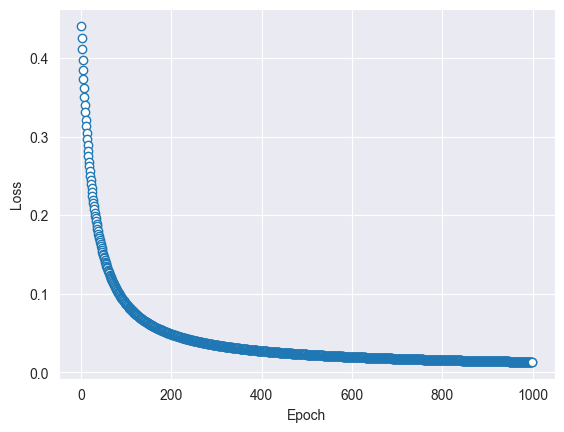

In [25]:
ann_classification, loss_function, optimizer = create_ann_model(.01)
losses, y_final_pred, total_accuracy = train_the_model(ann_classification, loss_function, optimizer)

print("Final accuracy: %g%%" %total_accuracy)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [26]:
learning_rates = np.linspace(.001, .1, 50)
accuracy_by_learning_rate = []
all_losses = np.zeros((len(learning_rates), epochs))

for i, learning_rate, in enumerate(learning_rates):
    ann_classification, loss_function, optimizer = create_ann_model(.01)
    losses, y_final_pred, total_accuracy = train_the_model(ann_classification, loss_function, optimizer)
    
    accuracy_by_learning_rate.append(total_accuracy)
    all_losses[i, :] = losses.detach()

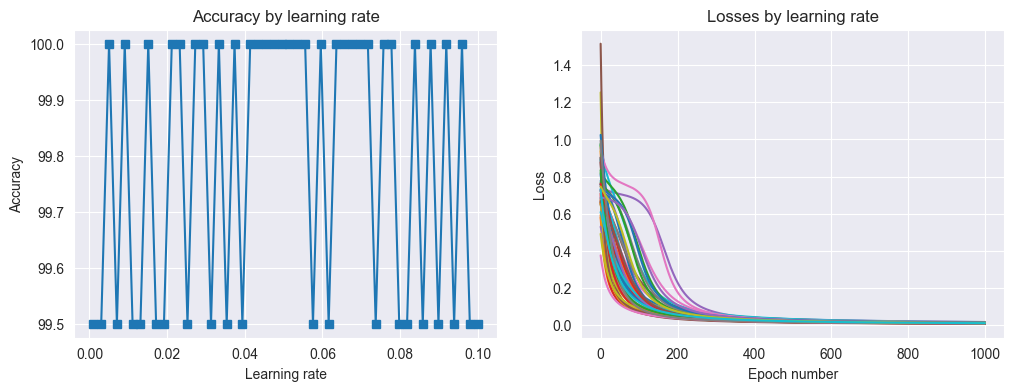

In [27]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learning_rates, accuracy_by_learning_rate, 's-')
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel('Accuracy')
ax[0].set_title("Accuracy by learning rate")
ax[1].plot(all_losses.T)
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel('Loss')
ax[1].set_title("Losses by learning rate")
plt.show()

In [28]:
sum(torch.tensor(accuracy_by_learning_rate) > 70) / len(accuracy_by_learning_rate)

tensor(1.)

## Multi-output ANN (iris dataset)

In [29]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


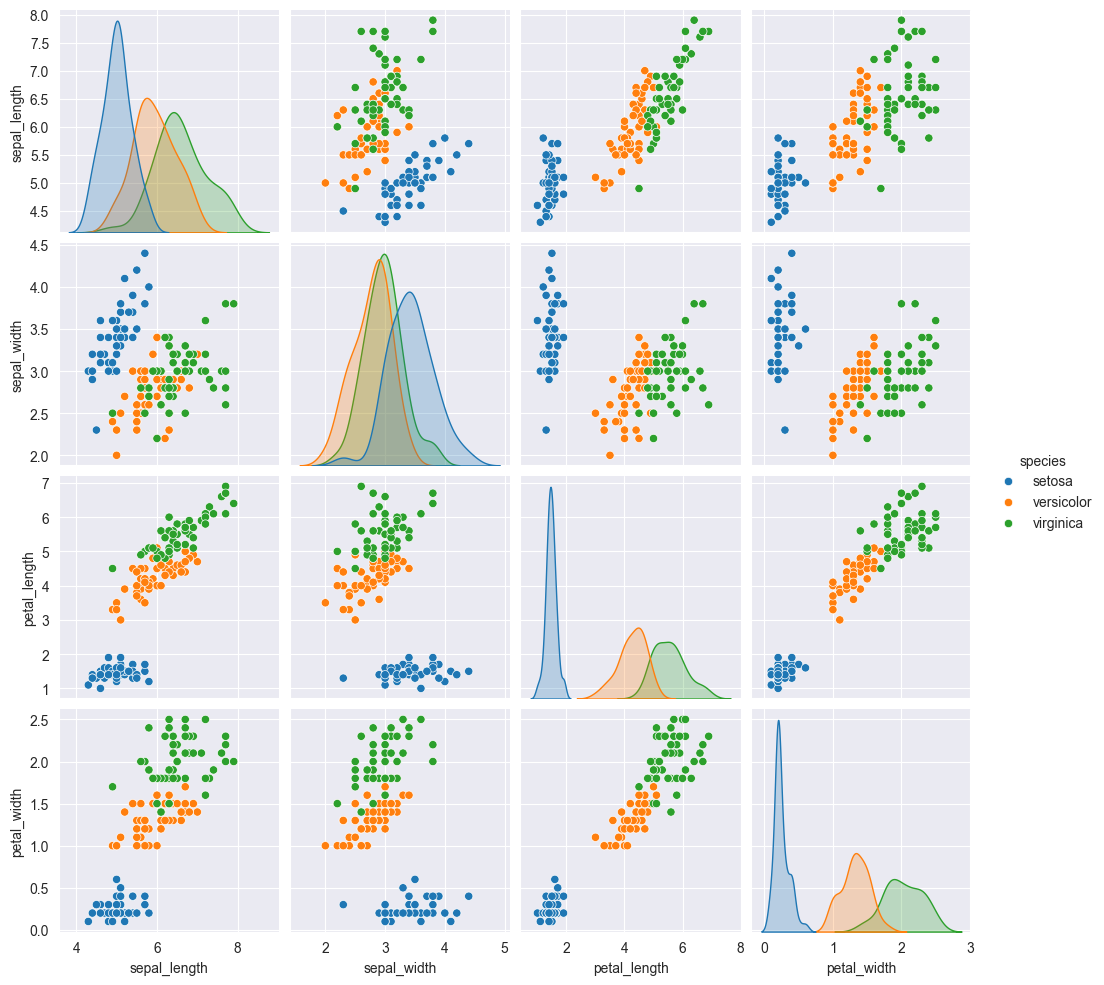

In [30]:
sns.pairplot(iris, hue='species')
plt.show()

In [31]:
x = torch.tensor(iris[iris.columns[0:4]].values).float()
y = torch.zeros(len(x), dtype=torch.long)
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [32]:
ann_iris = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3),
)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ann_iris.parameters(), .01)

In [33]:
epochs = 1000
losses = torch.zeros(epochs)
accuracies = []

for epoch in range(epochs):
    y_pred = ann_iris(x)
    loss = loss_function(y_pred, y)
    losses[epoch] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(y_pred, axis=1) == y
    accuracy = 100 * torch.mean(matches.float())

    accuracies.append(accuracy)
    
y_final_pred = ann_iris(x)
final_accuracy = 100 * torch.mean((torch.argmax(y_final_pred, axis=1) == y).float())

final_accuracy

tensor(98.6667)

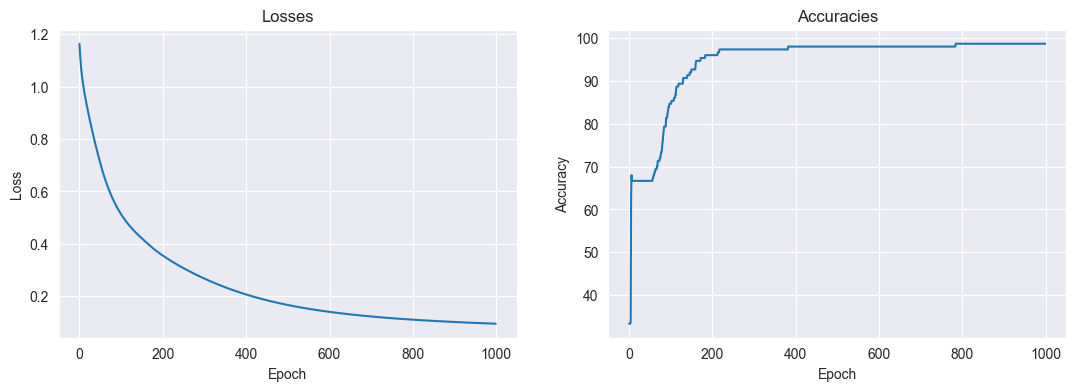

In [34]:
_, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')
ax[1].plot(accuracies)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracies')
plt.show()

In [35]:
softmax = nn.Softmax(1)

torch.sum(softmax(y_pred), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

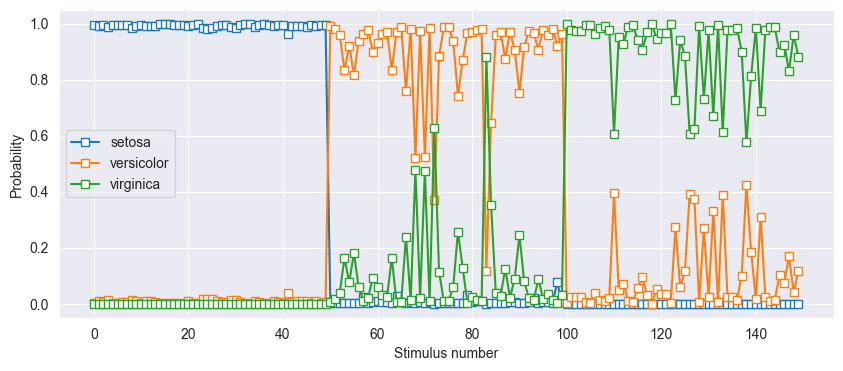

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(softmax(y_pred.detach()), 's-', markerfacecolor='w')
plt.xlabel("Stimulus number")
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

## CodeChallenge: more qwerties!

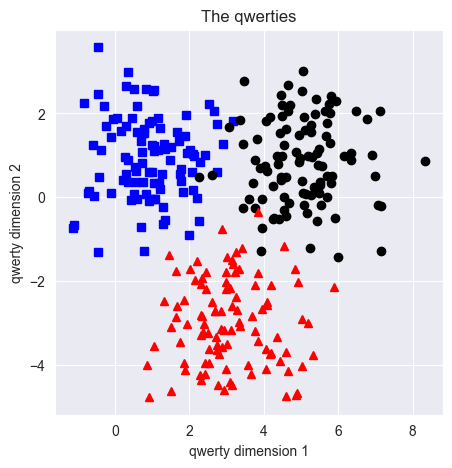

In [37]:
n_per_cluster = 100
blur = 1
A = [1, 1]
B = [5, 1]
C = [3, -3]
a = [A[0] + np.random.randn(n_per_cluster) * blur, A[1] + np.random.randn(n_per_cluster) * blur]
b = [B[0] + np.random.randn(n_per_cluster) * blur, B[1] + np.random.randn(n_per_cluster) * blur]
c = [C[0] + np.random.randn(n_per_cluster) * blur, C[1] + np.random.randn(n_per_cluster) * blur]
labels_np = np.vstack((np.zeros((n_per_cluster, 1)), np.ones((n_per_cluster, 1)), np.full((n_per_cluster, 1), 2)))
data_np = np.hstack((a, b, c)).T
y = torch.tensor(labels_np).reshape(n_per_cluster * 3).type(torch.LongTensor)
x = torch.tensor(data_np).float()

plt.figure(figsize=(5, 5))
plt.plot(x[np.where(y == 0)[0], 0], x[np.where(y == 0)[0], 1], 'bs')
plt.plot(x[np.where(y == 1)[0], 0], x[np.where(y == 1)[0], 1], 'ko')
plt.plot(x[np.where(y == 2)[0], 0], x[np.where(y == 2)[0], 1], 'r^')
plt.title("The qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [38]:
ann_qwerties = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Softmax(dim=1)
)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ann_qwerties.parameters(), .01)

In [39]:
epochs = 10000
losses = torch.zeros(epochs)
accuracies = []

for epoch in range(epochs):
    y_pred = ann_qwerties(x)
    loss = loss_function(y_pred, y)
    losses[epoch] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(y_pred, axis=1) == y
    accuracy = 100 * torch.mean(matches.float())

    accuracies.append(accuracy)
    
y_final_pred = ann_qwerties(x)
final_accuracy = 100 * torch.mean((torch.argmax(y_final_pred, axis=1) == y).float())

final_accuracy

tensor(97.3333)

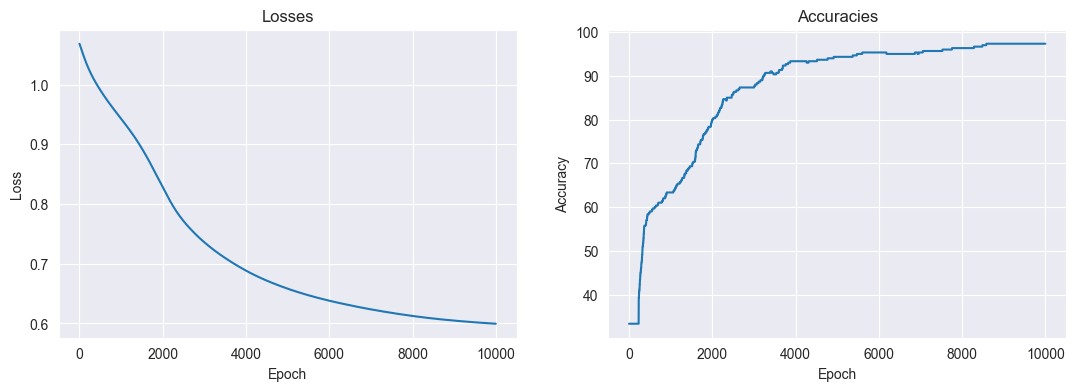

In [40]:
_, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')
ax[1].plot(accuracies)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracies')
plt.show()

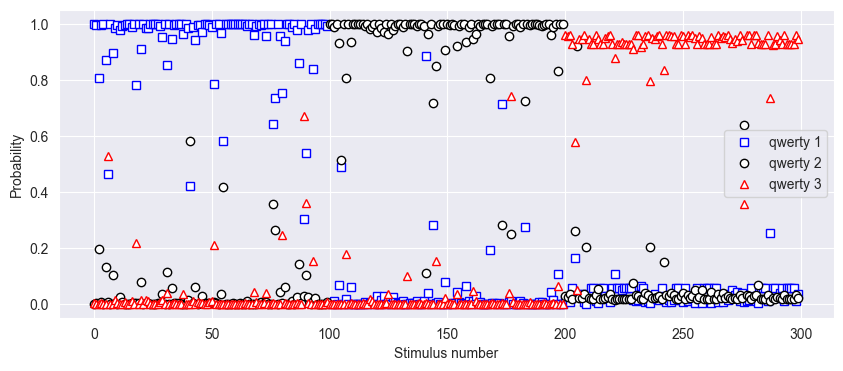

In [41]:
colorshape = ['bs', 'ko', 'r^']

plt.figure(figsize=(10, 4))

for i in range(3):
    plt.plot(y_pred[:, i].detach(), colorshape[i], markerfacecolor='w')

plt.xlabel("Stimulus number")
plt.ylabel('Probability')
plt.legend(['qwerty 1', 'qwerty 2', 'qwerty 3'])
plt.show()

## Comparing the number of hidden units

In [42]:
def create_ann_model(hidden_units_param):
    ann_classification_local = nn.Sequential(
        nn.Linear(4, hidden_units_param),
        nn.ReLU(),
        nn.Linear(hidden_units_param, hidden_units_param),
        nn.ReLU(),
        nn.Linear(hidden_units_param, 3),
    )
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_local = torch.optim.SGD(ann_classification_local.parameters(), .01)
    
    return ann_classification_local, loss_function_local, optimizer_local

def train_the_model(ann_classification_param, loss_function_param, optimizer_param):
    for epoch_local in range(epochs):
        y_pred_local = ann_classification_param(x)
        loss_local = loss_function_param(y_pred_local, y)
        
        optimizer_param.zero_grad()
        loss_local.backward()
        optimizer_param.step()
        
    y_final_pred_local = ann_classification_param(x)
    total_accuracy_local = 100 * torch.mean((torch.argmax(y_final_pred_local, axis=1) == y).float())
    
    return total_accuracy_local 

In [43]:
x = torch.tensor(iris[iris.columns[0:4]].values).float()
y = torch.zeros(len(x), dtype=torch.long)
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

epochs = 150
hidden_units = np.arange(1, 129)
accuracies = []

for hidden_unit in hidden_units:
    ann_classification, loss_function, optimizer = create_ann_model(hidden_unit)
    total_accuracy = train_the_model(ann_classification, loss_function, optimizer)
    
    accuracies.append(total_accuracy)

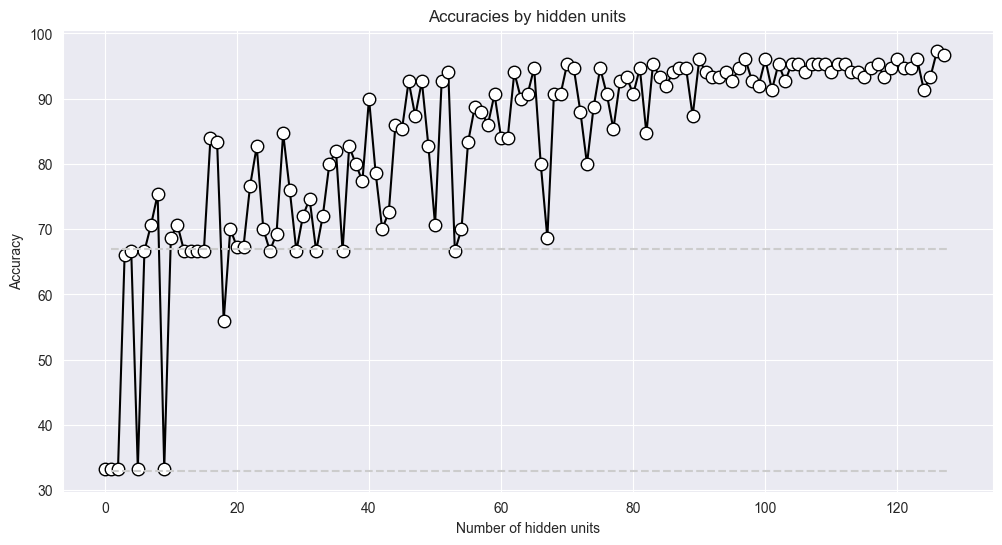

In [44]:
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(accuracies, 'ko-', markerfacecolor='w', markersize=9)
ax.plot(hidden_units[[0, -1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot(hidden_units[[0, -1]], [67, 67], '--', color=[.8, .8, .8])
ax.set_xlabel("Number of hidden units")
ax.set_ylabel('Accuracy')
ax.set_title("Accuracies by hidden units")
plt.show()

## Depth vs. breadth: number of parameters

In [45]:
wide_net = nn.Sequential(
    nn.Linear(2, 4),
    nn.Linear(4, 3)
)
deep_net = nn.Sequential(
    nn.Linear(2, 2),
    nn.Linear(2, 2),
    nn.Linear(2, 3),
)

In [46]:
print(wide_net)
print()

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)



In [47]:
print(deep_net)
print()

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)



In [48]:
def print_model_parameters(model):
    for parameters in model.parameters():
        print(parameters)
        print()

In [49]:
print_model_parameters(wide_net)

Parameter containing:
tensor([[-0.0659,  0.1842],
        [ 0.5503, -0.2292],
        [ 0.2101, -0.4151],
        [-0.5042, -0.4075]], requires_grad=True)

Parameter containing:
tensor([-0.3722,  0.2009, -0.2837, -0.4670], requires_grad=True)

Parameter containing:
tensor([[-0.3045,  0.3515, -0.1503,  0.3412],
        [-0.2888,  0.1283,  0.2346, -0.2149],
        [-0.1610,  0.3130,  0.1078, -0.1113]], requires_grad=True)

Parameter containing:
tensor([ 0.0685,  0.4252, -0.3772], requires_grad=True)



In [50]:
print_model_parameters(deep_net)

Parameter containing:
tensor([[ 0.1020, -0.2693],
        [-0.6907, -0.0187]], requires_grad=True)

Parameter containing:
tensor([-0.3838,  0.2105], requires_grad=True)

Parameter containing:
tensor([[-0.4155,  0.2319],
        [-0.4647, -0.4925]], requires_grad=True)

Parameter containing:
tensor([ 0.2625, -0.4677], requires_grad=True)

Parameter containing:
tensor([[-0.0445, -0.1936],
        [-0.1031, -0.2846],
        [-0.0844,  0.6586]], requires_grad=True)

Parameter containing:
tensor([ 0.2211, -0.1889,  0.1998], requires_grad=True)



In [51]:
def count_model_parameters(model):
    weights = 0

    for parameters in list(model.parameters()):
        units = 1

        for size in list(parameters.size()):
            units = units * size

        weights += units

    return weights

In [52]:
print(count_model_parameters(wide_net))

27


In [53]:
print(count_model_parameters(deep_net))

21


## Defining models using sequential vs. class

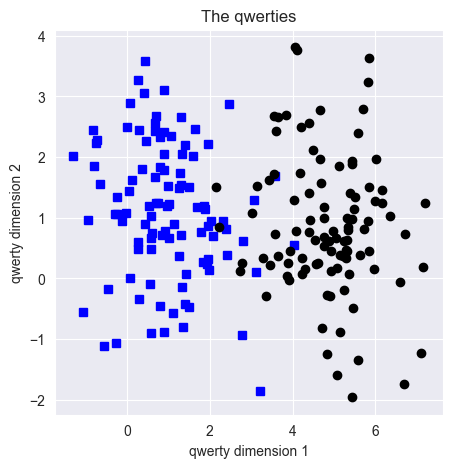

In [54]:
n_per_cluster = 100
blur = 1
A = [1, 1]
B = [5, 1]
a = [A[0] + np.random.randn(n_per_cluster) * blur, A[1] + np.random.randn(n_per_cluster) * blur]
b = [B[0] + np.random.randn(n_per_cluster) * blur, B[1] + np.random.randn(n_per_cluster) * blur]
labels_np = np.vstack((np.zeros((n_per_cluster, 1)), np.ones((n_per_cluster, 1))))
data_np = np.hstack((a, b)).T
y = torch.tensor(labels_np).float()
x = torch.tensor(data_np).float()

plt.figure(figsize=(5, 5))
plt.plot(x[np.where(y == 0)[0], 0], x[np.where(y == 0)[0], 1], 'bs')
plt.plot(x[np.where(y == 1)[0], 0], x[np.where(y == 1)[0], 1], 'ko')
plt.title("The qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [55]:
class AnnQwerties(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(2, 1)
        self.output = nn.Linear(1, 1)
    
    def forward(self, x_param):
        x_local = self.input(x_param)
        x_local = F.relu(x_local)
        x_local = self.output(x_local)
        x_local = torch.sigmoid(x_local)
        
        return x_local

In [56]:
ann_qwerties = AnnQwerties()

In [57]:
learning_rate = .01
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(ann_qwerties.parameters(), learning_rate)
epochs = 1000
losses = torch.zeros(epochs)

for epoch in range(epochs):
    y_pred = ann_qwerties(x)
    loss = loss_function(y_pred, y)
    losses[epoch] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

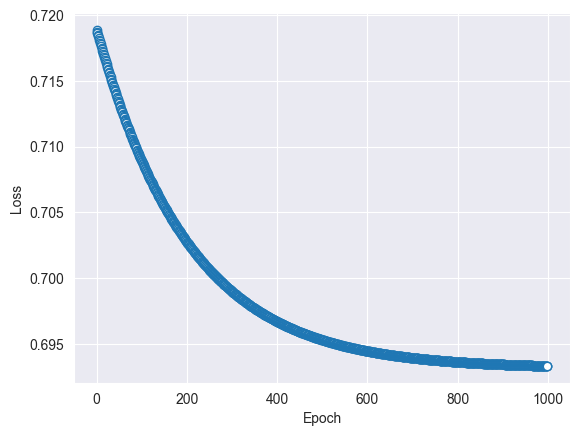

In [58]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [59]:
y_final_pred = ann_qwerties(x) > .5
misclassified = np.where(y_final_pred != y)[0]
total_accuracy = 100 - 100 * len(misclassified) / (2 * n_per_cluster)

print("Final accuracy: %g%%" %total_accuracy)

Final accuracy: 50%


## Model depth vs. breadth

In [60]:
x = torch.tensor(iris[iris.columns[0:4]].values).float()
y = torch.zeros(len(x), dtype=torch.long)
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

In [61]:
class AnnIris(nn.Module):
    def __init__(self, units, layers):
        super().__init__()
        
        self.layers = nn.ModuleDict()
        self.layers_nr = layers
        self.layers['input'] = nn.Linear(4, units)
        
        for layer in range(layers):
            self.layers[f'hidden_{layer}'] = nn.Linear(units, units)
            
        self.layers['output'] = nn.Linear(units, 3)
        
    def forward(self, x_param):
        x_local = self.layers['input'](x_param)
        
        for layer in range(self.layers_nr):
            x_local = F.relu(self.layers[f'hidden_{layer}'](x_local))
            
        x_local = self.layers['output'](x_local)
        
        return x_local

In [62]:
units_per_layer_nr = 12
layers_nr = 4
ann_iris = AnnIris(units_per_layer_nr, layers_nr)

ann_iris

AnnIris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden_0): Linear(in_features=12, out_features=12, bias=True)
    (hidden_1): Linear(in_features=12, out_features=12, bias=True)
    (hidden_2): Linear(in_features=12, out_features=12, bias=True)
    (hidden_3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [63]:
def train_the_model(ann_iris_param, epochs_param):
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_local = torch.optim.SGD(ann_iris_param.parameters(), .01)
    
    for epoch_local in range(epochs_param):
        y_pred_local = ann_iris_param(x)
        loss_local = loss_function_local(y_pred_local, y)
        
        optimizer_local.zero_grad()
        loss_local.backward()
        optimizer_local.step()
        
    y_final_pred_local = ann_iris_param(x)
    total_accuracy_local = 100 * torch.mean((torch.argmax(y_final_pred_local, axis=1) == y).float())
    total_parameters_nr = sum(parameters.numel() for parameters in ann_iris_param.parameters() if parameters.requires_grad)
    
    return total_accuracy_local, total_parameters_nr

In [64]:
epochs = 500
accuracy_and_parameters_nr = train_the_model(ann_iris, epochs)

accuracy_and_parameters_nr

(tensor(33.3333), 723)

In [65]:
layers_nr = range(1, 6)
units_nr = np.arange(4, 101, 3)
accuracies = np.zeros((len(units_nr), len(layers_nr)))
parameters_nr = np.zeros((len(units_nr), len(layers_nr)))
epochs = 1000

for unit_i, unit_nr in enumerate(units_nr):
    for layer_j, layer_nr in enumerate(layers_nr):
        ann_iris_local = AnnIris(unit_nr, layer_nr)
        accuracy_local, parameters_nr_local = train_the_model(ann_iris_local, epochs)
        accuracies[unit_i, layer_j] = accuracy_local
        parameters_nr[unit_i, layer_j] = parameters_nr_local

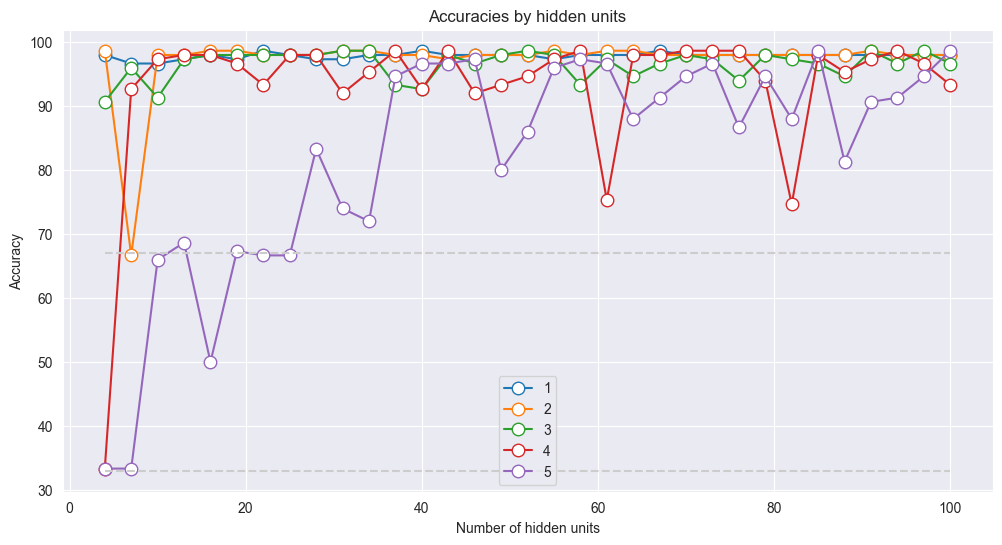

In [66]:
_, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(units_nr, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(units_nr[[0, -1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot(units_nr[[0, -1]], [67, 67], '--', color=[.8, .8, .8])
ax.legend(layers_nr)
ax.set_xlabel("Number of hidden units")
ax.set_ylabel('Accuracy')
ax.set_title("Accuracies by hidden units")
plt.show()

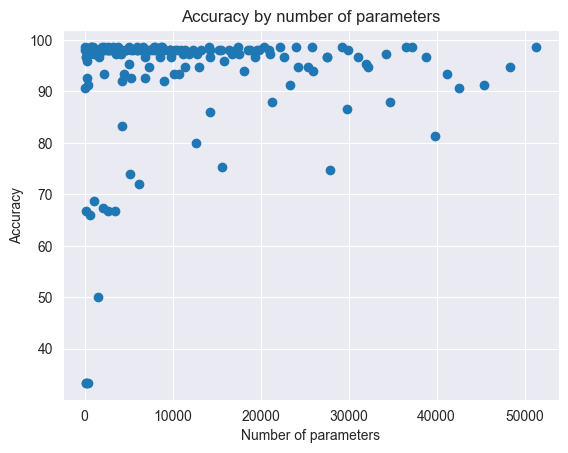

In [67]:
x = parameters_nr.flatten()
y = accuracies.flatten()

plt.plot(x, y, 'o')
plt.xlabel("Number of parameters")
plt.ylabel('Accuracy')
plt.title("Accuracy by number of parameters")
plt.show()